In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [3]:
train.head().T

,0,1,2,3,4
id,0.000,1.00,2.00,3.000,4.000
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000
RiverManagement,5.000,4.00,6.00,6.000,2.000
Deforestation,8.000,4.00,7.00,5.000,6.000
Urbanization,6.000,8.00,3.00,4.000,4.000
ClimateChange,4.000,8.00,7.00,8.000,4.000
DamsQuality,4.000,3.00,1.00,4.000,3.000
Siltation,3.000,5.00,5.00,7.000,3.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000


In [4]:
test.head().T

,0,1,2,3,4
id,1117957,1117958,1117959,1117960,1117961
MonsoonIntensity,4,4,1,2,6
TopographyDrainage,6,4,3,4,3
RiverManagement,3,2,6,4,2
Deforestation,5,9,5,6,4
Urbanization,6,5,7,4,6
ClimateChange,7,5,2,5,4
DamsQuality,8,4,4,4,5
Siltation,7,7,6,3,5
AgriculturalPractices,8,5,4,4,3


In [5]:
#Making sure the data is imported in Dataframe
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
#Checking if any column has empty cells
cols_with_missing = [c for c in train.columns if train[c].isnull().any()]
print(cols_with_missing)

[]


In [7]:
#Checking what features are included in dataset
print(train.columns)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [8]:
#Getting various details of the dataset such as mean, standard deviation, min, max, median etc
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [9]:
#Finding correlation between datasets
train.corr()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


In [10]:
#Preping for a correlation heatmap: For removing the upper triangle
mask = np.zeros_like(train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

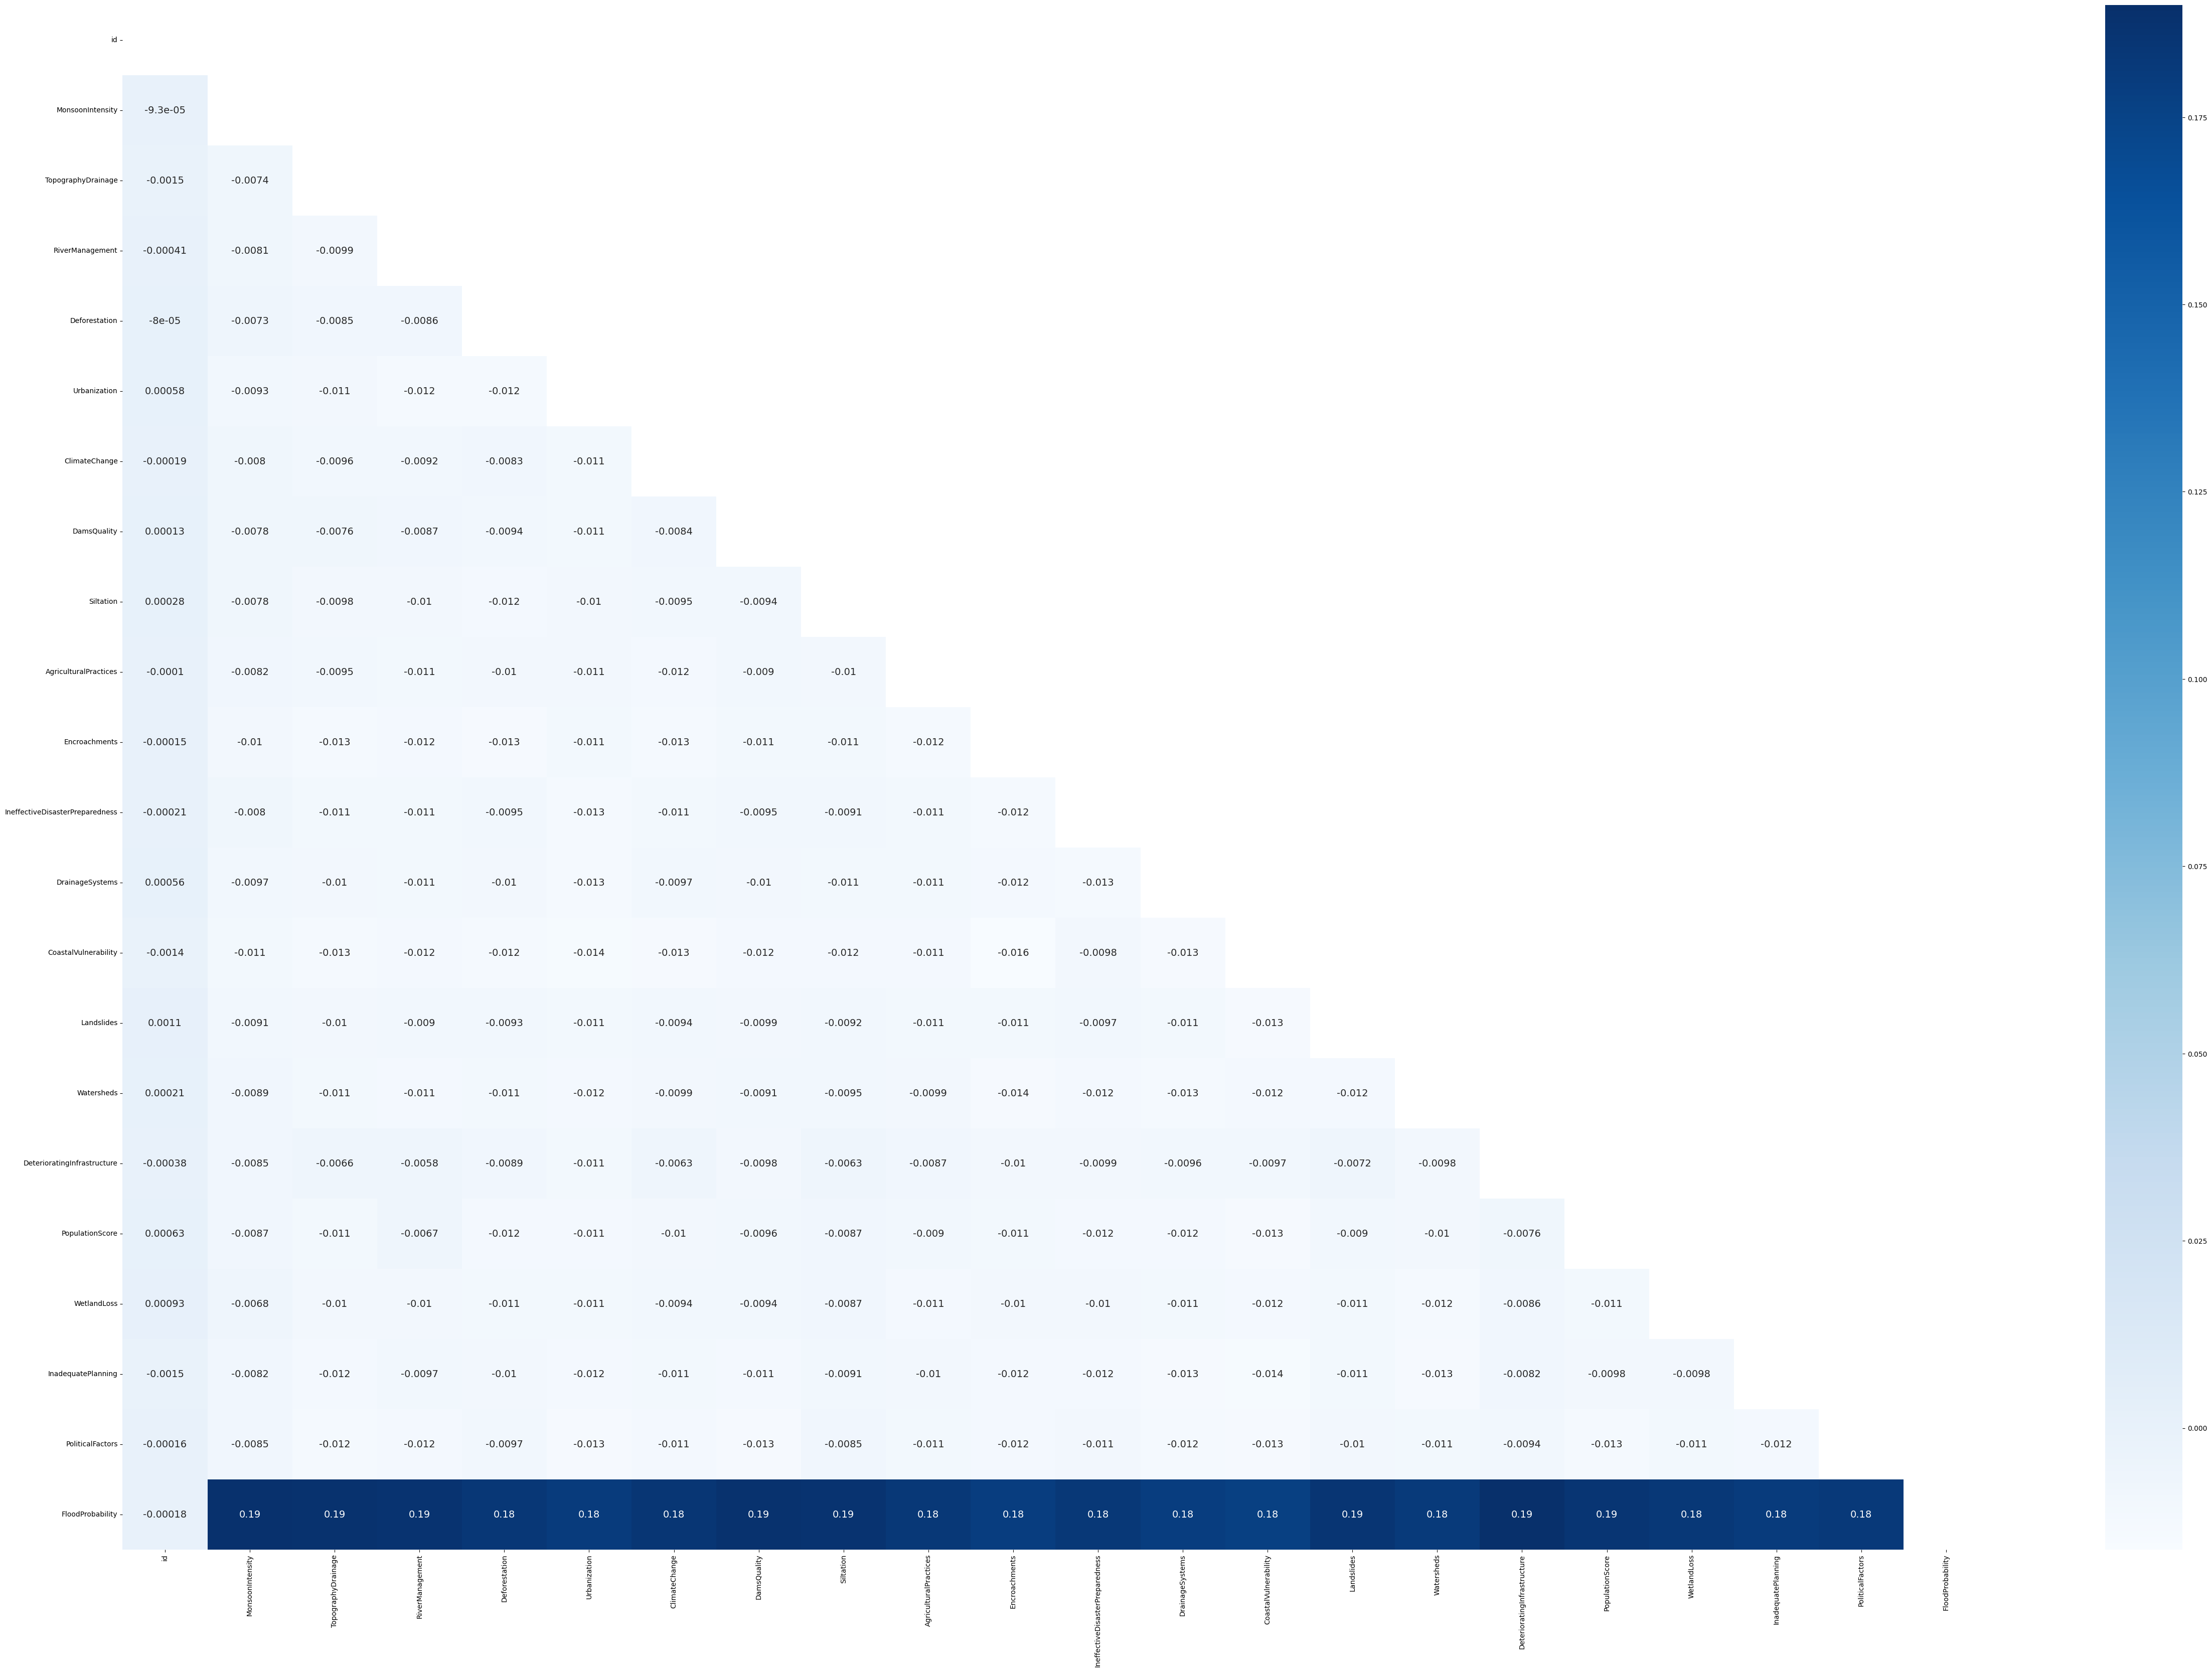

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(60,40))
sns.heatmap(train.corr(), cmap="Blues", mask=mask, annot=True, annot_kws={'size':14})
sns.set_style('dark')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()
#From the graph below, we can see that the feartures are not at all correlated(id can be excluded)

In [12]:
train_prob1 = train.loc[:, ['FloodProbability']].copy()
type(train_prob1)

pandas.core.frame.DataFrame

In [13]:
#Taking the probability values seperately from the dataset
train_prob = train['FloodProbability']
train.drop('FloodProbability', axis=1, inplace=True)
train_prob

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [14]:
 ##Adding the column values excluding id and probability
train_1 = train.copy()
print(train_1)

              id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0              0                 5                   8                5   
1              1                 6                   7                4   
2              2                 6                   5                6   
3              3                 3                   4                6   
4              4                 5                   3                2   
...          ...               ...                 ...              ...   
1117952  1117952                 3                   3                4   
1117953  1117953                 2                   2                4   
1117954  1117954                 7                   3                9   
1117955  1117955                 7                   3                3   
1117956  1117956                 4                   5                6   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                   

In [15]:
# for i in train.columns[1:-1]:
#     plt.figure(figsize=(10, 8))
#     plt.scatter(train[i], train_prob)
#     plt.show()

In [16]:
train_1['Sum'] = train_1[train.columns[1:-1]].sum(axis=1)
for col in train.columns:
    if col!='id':
        
        del train_1[col]
train_1

,id,Sum
0,0,91
1,1,91
2,2,96
3,3,99
4,4,67
...,...,...
1117952,1117952,95
1117953,1117953,91
1117954,1117954,94
1117955,1117955,95


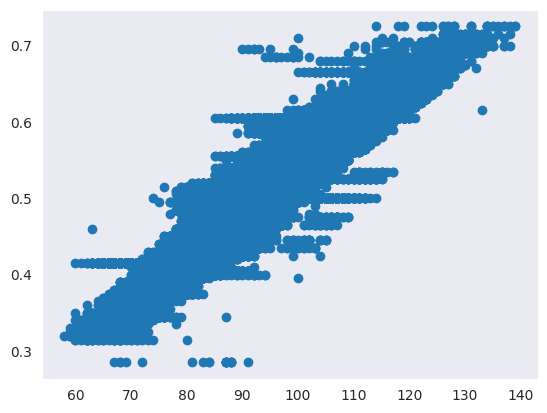

In [17]:
#Comparing Sum and probability on a graph
plt.scatter(train_1['Sum'], train_prob)
plt.show()

In [18]:

# train_1['FloodProbability'] = train
# train_1.corr(train["FloodProbability"])

<Axes: >

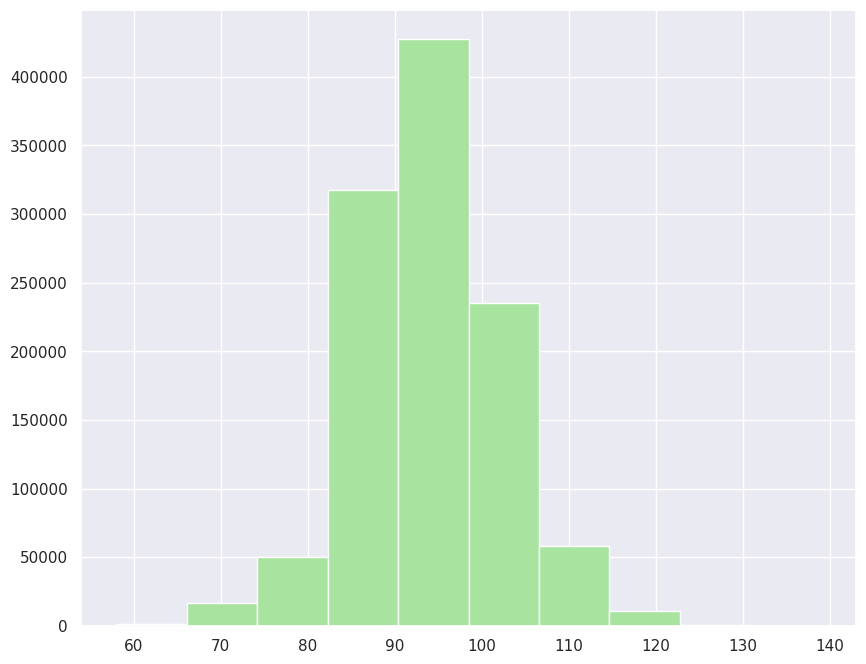

In [19]:
sns.set(rc={'figure.figsize': (10, 8)})
train_1['Sum'].hist(color='#A8E4A0')

In [20]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(train_1, train_prob)

# # res = model.predict(test)
# # res = np.transpose(res)
# test_1 = test.copy()
# test_1['Sum'] = test_1[test.columns[1:-1]].sum(axis=1)
# for col in test.columns:
#     if col!='id':
#         del test_1[col]
# test_1


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_1, train_prob)

# res = model.predict(test)
# res = np.transpose(res)
test_1 = test.copy()
test_1['Sum'] = test_1[test.columns[1:-1]].sum(axis=1)
for col in test.columns:
    if col!='id':
        del test_1[col]
test_1

,id,Sum
0,1117957,106
1,1117958,87
2,1117959,87
3,1117960,88
4,1117961,87
...,...,...
745300,1863257,88
745301,1863258,85
745302,1863259,116
745303,1863260,102


In [22]:
res = model.predict(test_1)
res = np.transpose(res)

In [23]:
type(res)

numpy.ndarray

In [24]:
output = pd.DataFrame({'id': test.id, 'FloodProbability': res})
output

,id,FloodProbability
0,1117957,0.572144
1,1117958,0.466366
2,1117959,0.466366
3,1117960,0.471934
4,1117961,0.466366
...,...,...
745300,1863257,0.471957
745301,1863258,0.455255
745302,1863259,0.627839
745303,1863260,0.549898


In [25]:
# output.head()
output.to_csv('/kaggle/working/submission.csv', index=False)